<a href="https://colab.research.google.com/github/03LimbuA/Crime-Analysis/blob/main/CrimeANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from encodings.aliases import aliases

%matplotlib inline

In [ ]:
alias_values = set(aliases.values())

for encoding in set(aliases.values()):
    try:
        df=pd.read_csv("crime.csv", nrows=10, encoding=encoding)
        print('successful', encoding)
    except:
        pass

successful mac_roman
successful cp860
successful latin_1
successful cp1125
successful cp1250
successful cp1252
successful cp932
successful iso8859_4
successful cp1258
successful ptcp154
successful gb18030
successful cp869
successful iso8859_5
successful cp1256
successful cp037
successful cp949
successful cp437
successful gbk
successful iso8859_2
successful cp775
successful cp862
successful cp1255
successful iso8859_3
successful iso8859_6
successful mac_iceland
successful cp1257
successful cp866
successful big5hkscs
successful utf_16_le
successful cp850
successful koi8_r
successful iso8859_15
successful iso8859_14
successful iso8859_13
successful cp857
successful cp864
successful cp852
successful cp273
successful iso8859_8
successful mac_latin2
successful mac_greek
successful cp1251
successful cp1026
successful cp855
successful iso8859_10
successful cp1140
successful cp1253
successful iso8859_9
successful cp863
successful utf_16_be
successful cp858
successful iso8859_11
successful iso88

In [ ]:
crime = pd.read_csv("/content/crime.csv", encoding="ISO-8859-11")

In [ ]:
crime.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018.0,9.0,Sunday,13.0,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018.0,8.0,Tuesday,0.0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018.0,9.0,Monday,19.0,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018.0,9.0,Monday,21.0,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018.0,9.0,Monday,21.0,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [ ]:
crime.shape

(319073, 17)

In [ ]:
crime.duplicated().sum()

23

In [ ]:
crime

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319068,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,D4,285,NaN,2016-06-05 17:25:00,2016,6,Sunday,17,Part Three,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)"
319069,I030217815-08,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part One,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319070,I030217815-08,3125,Warrant Arrests,WARRANT ARREST,E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part Three,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319071,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,E13,569,NaN,2016-05-31 19:35:00,2016,5,Tuesday,19,Part Three,NEW WASHINGTON ST,42.302333,-71.111565,"(42.30233307, -71.11156487)"


In [ ]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319073 entries, 0 to 319072
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INCIDENT_NUMBER      319073 non-null  object 
 1   OFFENSE_CODE         319073 non-null  int64  
 2   OFFENSE_CODE_GROUP   319073 non-null  object 
 3   OFFENSE_DESCRIPTION  319073 non-null  object 
 4   DISTRICT             317308 non-null  object 
 5   REPORTING_AREA       319073 non-null  object 
 6   SHOOTING             1019 non-null    object 
 7   OCCURRED_ON_DATE     319073 non-null  object 
 8   YEAR                 319073 non-null  int64  
 9   MONTH                319073 non-null  int64  
 10  DAY_OF_WEEK          319073 non-null  object 
 11  HOUR                 319073 non-null  int64  
 12  UCR_PART             318983 non-null  object 
 13  STREET               308202 non-null  object 
 14  Lat                  299074 non-null  float64
 15  Long             

In [ ]:
crime.OCCURRED_ON_DATE = pd.to_datetime(crime.OCCURRED_ON_DATE)

In [ ]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319073 entries, 0 to 319072
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   INCIDENT_NUMBER      319073 non-null  object        
 1   OFFENSE_CODE         319073 non-null  int64         
 2   OFFENSE_CODE_GROUP   319073 non-null  object        
 3   OFFENSE_DESCRIPTION  319073 non-null  object        
 4   DISTRICT             317308 non-null  object        
 5   REPORTING_AREA       319073 non-null  object        
 6   SHOOTING             1019 non-null    object        
 7   OCCURRED_ON_DATE     319073 non-null  datetime64[ns]
 8   YEAR                 319073 non-null  int64         
 9   MONTH                319073 non-null  int64         
 10  DAY_OF_WEEK          319073 non-null  object        
 11  HOUR                 319073 non-null  int64         
 12  UCR_PART             318983 non-null  object        
 13  STREET        

In [ ]:
crime.OCCURRED_ON_DATE.dt.year

,OCCURRED_ON_DATE
0,2018
1,2018
2,2018
3,2018
4,2018
...,...
319068,2016
319069,2015
319070,2015
319071,2016


In [ ]:
crime.OCCURRED_ON_DATE.dt.month

,OCCURRED_ON_DATE
0,9
1,8
2,9
3,9
4,9
...,...
319068,6
319069,7
319070,7
319071,5


In [ ]:
crime.OCCURRED_ON_DATE.dt.weekday

,OCCURRED_ON_DATE
0,6
1,1
2,0
3,0
4,0
...,...
319068,6
319069,3
319070,3
319071,1


In [ ]:
crime.OCCURRED_ON_DATE.dt.hour

,OCCURRED_ON_DATE
0,13
1,0
2,19
3,21
4,21
...,...
319068,17
319069,13
319070,13
319071,19


In [ ]:
crime.OCCURRED_ON_DATE.dt.minute

,OCCURRED_ON_DATE
0,0
1,0
2,27
3,16
4,5
...,...
319068,25
319069,38
319070,38
319071,35


In [ ]:
crime.describe()

,OFFENSE_CODE,OCCURRED_ON_DATE,YEAR,MONTH,HOUR,Lat,Long
count,319073.000000,319073,319073.000000,319073.000000,319073.000000,299074.000000,299074.000000
mean,2317.546956,2017-01-25 11:54:00.922723072,2016.560586,6.609719,13.118205,42.214381,-70.908272
min,111.000000,2015-06-15 00:00:00,2015.000000,1.000000,0.000000,-1.000000,-71.178674
25%,1001.000000,2016-04-12 01:23:00,2016.000000,4.000000,9.000000,42.297442,-71.097135
50%,2907.000000,2017-01-28 03:17:00,2017.000000,7.000000,14.000000,42.325538,-71.077524
75%,3201.000000,2017-11-05 18:14:00,2017.000000,9.000000,18.000000,42.348624,-71.062467
max,3831.000000,2018-09-03 21:25:00,2018.000000,12.000000,23.000000,42.395042,-1.000000
std,1185.285543,NaN,0.996344,3.273691,6.294205,2.159766,3.493618


In [ ]:
crime.describe(include='object')

,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,DAY_OF_WEEK,UCR_PART,STREET,Location
count,319073,319073,319073,317308,319073,1019,319073,318983,308202,319073
unique,282517,67,244,12,879,1,7,4,4657,18194
top,I162030584,Motor Vehicle Accident Response,SICK/INJURED/MEDICAL - PERSON,B2,,Y,Friday,Part Three,WASHINGTON ST,"(0.00000000, 0.00000000)"
freq,13,37132,18783,49945,20250,1019,48495,158553,14194,19999


In [ ]:
crime.columns[np.sum(crime.isnull()) != 0]

/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


Index(['DISTRICT', 'SHOOTING', 'UCR_PART', 'STREET', 'Lat', 'Long'], dtype='object')

In [ ]:
print('Missing values in each column \n')
crime[crime.columns].isnull().sum()

Missing values in each column 



,0
INCIDENT_NUMBER,0
OFFENSE_CODE,0
OFFENSE_CODE_GROUP,0
OFFENSE_DESCRIPTION,0
DISTRICT,1765
REPORTING_AREA,0
SHOOTING,318054
OCCURRED_ON_DATE,0
YEAR,0
MONTH,0


In [ ]:
crime.columns[np.sum(crime.isnull()) == 0]

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'REPORTING_AREA', 'OCCURRED_ON_DATE', 'YEAR',
       'MONTH', 'DAY_OF_WEEK', 'HOUR', 'Location'],
      dtype='object')

In [ ]:
for col in crime.columns:
    unique_count = crime[col].nunique()
    print(col + " has " + str(unique_count) + " unique values")

INCIDENT_NUMBER has 282517 unique values
OFFENSE_CODE has 222 unique values
OFFENSE_CODE_GROUP has 67 unique values
OFFENSE_DESCRIPTION has 244 unique values
DISTRICT has 12 unique values
REPORTING_AREA has 879 unique values
SHOOTING has 1 unique values
OCCURRED_ON_DATE has 233229 unique values
YEAR has 4 unique values
MONTH has 12 unique values
DAY_OF_WEEK has 7 unique values
HOUR has 24 unique values
UCR_PART has 4 unique values
STREET has 4657 unique values
Lat has 18178 unique values
Long has 18178 unique values
Location has 18194 unique values


In [ ]:
crime.OFFENSE_CODE_GROUP.value_counts()

,count
OFFENSE_CODE_GROUP,
Motor Vehicle Accident Response,37132
Larceny,25935
Medical Assistance,23540
Investigate Person,18750
Other,18075
...,...
HUMAN TRAFFICKING,7
INVESTIGATE PERSON,4
Biological Threat,2


,count
OFFENSE_CODE_GROUP,
Motor Vehicle Accident Response,0.116375
Larceny,0.081282
Medical Assistance,0.073776
Investigate Person,0.058764
Other,0.056648
Drug Violation,0.051863
Simple Assault,0.049600
Vandalism,0.048312
Verbal Disputes,0.041053


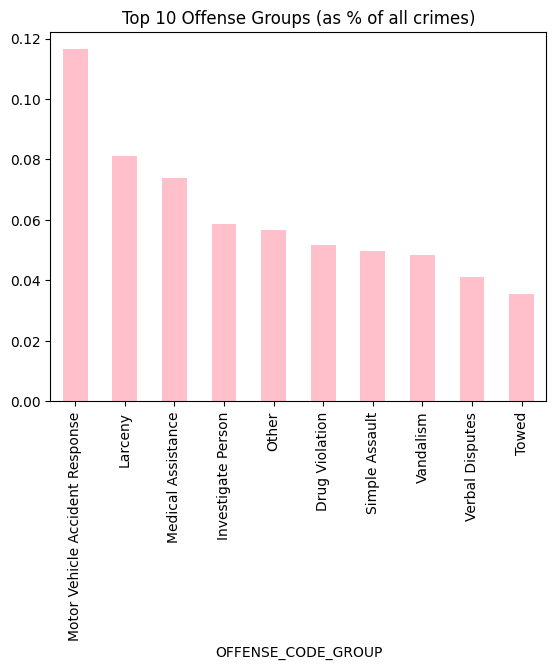

In [ ]:
offense_group_vals = crime.OFFENSE_CODE_GROUP.value_counts()[:10]

display(offense_group_vals / crime.shape[0])

(offense_group_vals / crime.shape[0]).plot(kind='bar', color='pink');
plt.title('Top 10 Offense Groups (as % of all crimes)');

In [ ]:
crime.OFFENSE_CODE_GROUP.value_counts().sort_values(ascending=True)[:10]

,count
OFFENSE_CODE_GROUP,
Burglary - No Property Taken,2
HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE,2
Biological Threat,2
INVESTIGATE PERSON,4
HUMAN TRAFFICKING,7
Gambling,8
Manslaughter,8
Explosives,27
Phone Call Complaints,31


In [ ]:
crime.OFFENSE_DESCRIPTION.value_counts()

,count
OFFENSE_DESCRIPTION,
SICK/INJURED/MEDICAL - PERSON,18783
INVESTIGATE PERSON,18754
M/V - LEAVING SCENE - PROPERTY DAMAGE,16323
VANDALISM,15154
ASSAULT SIMPLE - BATTERY,14791
...,...
KILLING OF FELON BY POLICE,1
AUTO THEFT - OUTSIDE - RECOVERED IN BOSTON,1
DRUGS - GLUE INHALATION,1


,count
OFFENSE_DESCRIPTION,
SICK/INJURED/MEDICAL - PERSON,0.058867
INVESTIGATE PERSON,0.058777
M/V - LEAVING SCENE - PROPERTY DAMAGE,0.051158
VANDALISM,0.047494
ASSAULT SIMPLE - BATTERY,0.046356
VERBAL DISPUTE,0.041053
TOWED MOTOR VEHICLE,0.035374
INVESTIGATE PROPERTY,0.034863
LARCENY THEFT FROM BUILDING,0.028423


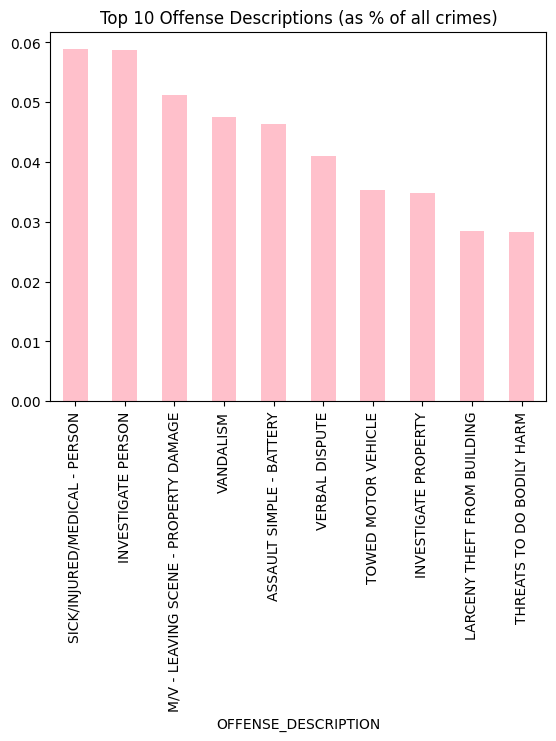

In [ ]:
offense_description_vals = crime.OFFENSE_DESCRIPTION.value_counts()[:10]

display(offense_description_vals / crime.shape[0])

(offense_description_vals / crime.shape[0]).plot(kind='bar', color='pink');
plt.title('Top 10 Offense Descriptions (as % of all crimes)');

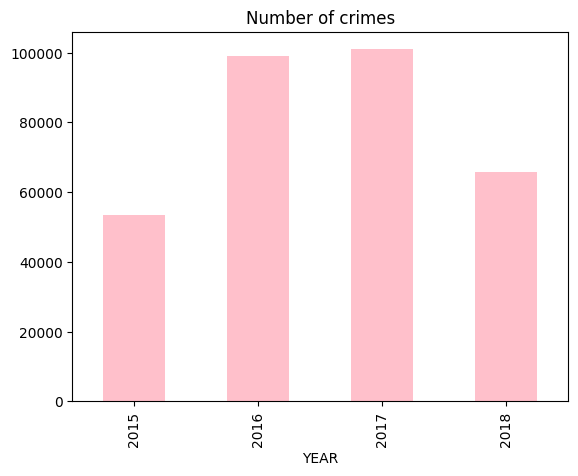

In [ ]:
crime.groupby('YEAR').count()['INCIDENT_NUMBER'].plot(kind='bar', color='pink');
plt.title('Number of crimes');

,INCIDENT_NUMBER
DAY_OF_WEEK,
Friday,48495
Wednesday,46729
Thursday,46656
Tuesday,46383
Monday,45679
Saturday,44818
Sunday,40313


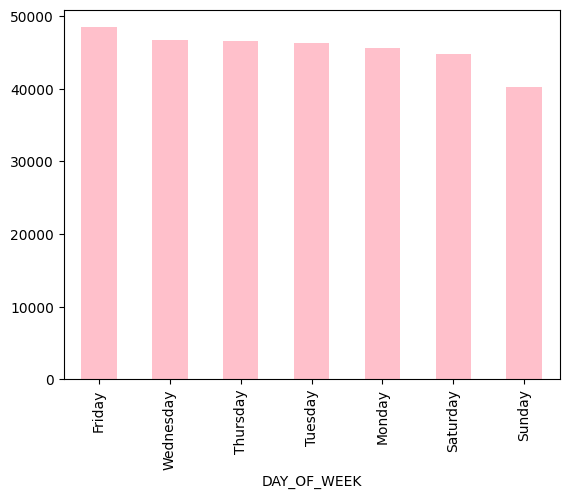

In [ ]:
display(crime.groupby('DAY_OF_WEEK').count()['INCIDENT_NUMBER'].sort_values(ascending=False));

crime.groupby('DAY_OF_WEEK').count()['INCIDENT_NUMBER'].sort_values(ascending=False).plot(kind='bar', color='pink');


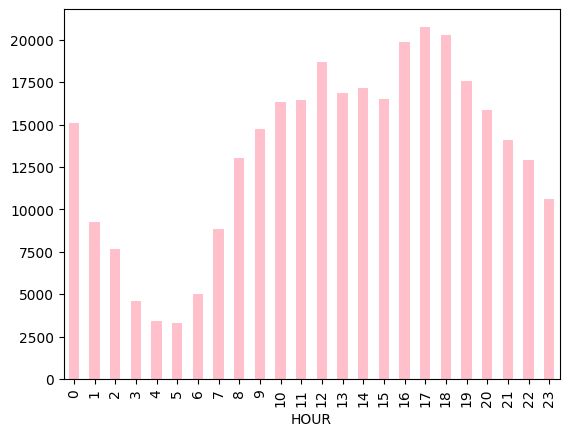

In [ ]:
crime.groupby('HOUR').count()['INCIDENT_NUMBER'].plot(kind='bar', color='pink');

In [ ]:
week_and_hour = crime.groupby(['HOUR','DAY_OF_WEEK']).count()['INCIDENT_NUMBER'].unstack()

In [ ]:
week_and_hour = week_and_hour[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]


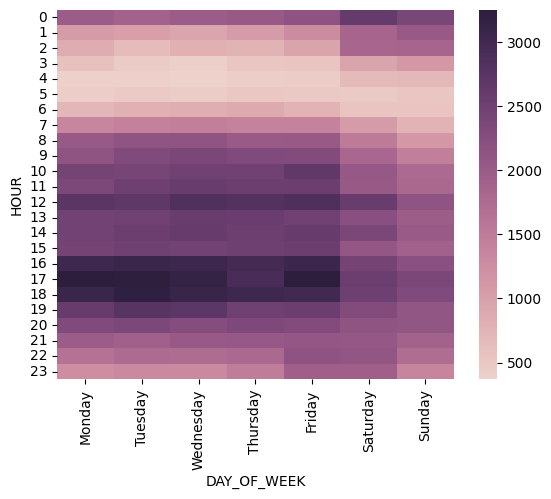

In [ ]:
sns.heatmap(week_and_hour, cmap=sns.cubehelix_palette(as_cmap=True));

In [ ]:
avg_crime = crime.groupby(['YEAR', 'MONTH']).count()['INCIDENT_NUMBER'].mean()
print("The average number of crimes is " + str(avg_crime))

year_and_month = crime.groupby(['MONTH', 'YEAR']).count()['INCIDENT_NUMBER'].unstack()

def style_negative(v, props=''):
    return props if v < avg_crime else None
s2 = year_and_month.style.applymap(style_negative, props='color:blue;')\
              .applymap(lambda v: 'opacity: 20%;' if (v < 0.3) and (v > -0.3) else None)
s2

The average number of crimes is 7976.825


<ipython-input-80-e422682cfd4b>:8: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  s2 = year_and_month.style.applymap(style_negative, props='color:blue;')\
<ipython-input-80-e422682cfd4b>:9: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  .applymap(lambda v: 'opacity: 20%;' if (v < 0.3) and (v > -0.3) else None)


YEAR,2015,2016,2017,2018
MONTH,,,,
1,nan,7835.000000,7993.000000,7782.000000
2,nan,7308.000000,7408.000000,6937.000000
3,nan,8199.000000,8179.000000,7768.000000
4,nan,8101.000000,8069.000000,7916.000000
5,nan,8578.000000,8715.000000,8906.000000
6,4191.000000,8558.000000,8985.000000,8834.000000
7,8324.000000,8619.000000,9075.000000,8538.000000
8,8342.000000,8938.000000,9206.000000,8337.000000
9,8414.000000,8522.000000,8940.000000,667.000000


In [ ]:
def highlight_max(s, props=''):
    return np.where(s == np.nanmax(s.values), props, '')
s2.apply(highlight_max, props='color:white;background-color:darkgreen', axis=0)


YEAR,2015,2016,2017,2018
MONTH,,,,
1,nan,7835.000000,7993.000000,7782.000000
2,nan,7308.000000,7408.000000,6937.000000
3,nan,8199.000000,8179.000000,7768.000000
4,nan,8101.000000,8069.000000,7916.000000
5,nan,8578.000000,8715.000000,8906.000000
6,4191.000000,8558.000000,8985.000000,8834.000000
7,8324.000000,8619.000000,9075.000000,8538.000000
8,8342.000000,8938.000000,9206.000000,8337.000000
9,8414.000000,8522.000000,8940.000000,667.000000


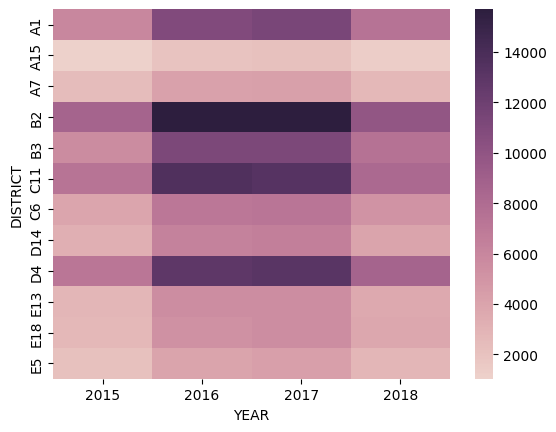

In [ ]:
district_and_year = crime.groupby(['DISTRICT', 'YEAR']).count()['INCIDENT_NUMBER'].unstack()

sns.heatmap(district_and_year, cmap=sns.cubehelix_palette(as_cmap=True));

In [ ]:
avg_crime_district = crime.groupby(['DISTRICT', 'YEAR']).count()['INCIDENT_NUMBER'].mean()
print("The average crime per district per year is: " + str(avg_crime_district))

def style_negative(v, props=''):
    return props if v < avg_crime_district else None
s3 = district_and_year.style.applymap(style_negative, props='color:blue;')\
              .applymap(lambda v: 'opacity: 20%;' if (v < 0.3) and (v > -0.3) else None)
s3

The average crime per district per year is: 6610.583333333333


<ipython-input-83-764378e1eb6e>:6: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  s3 = district_and_year.style.applymap(style_negative, props='color:blue;')\
<ipython-input-83-764378e1eb6e>:7: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  .applymap(lambda v: 'opacity: 20%;' if (v < 0.3) and (v > -0.3) else None)


YEAR,2015,2016,2017,2018
DISTRICT,,,,
A1,6015,10923,11375,7404
A15,1027,1986,2167,1325
A7,2426,4130,4264,2724
B2,8687,15706,15680,9872
B3,5617,11145,11195,7485
C11,7364,13603,13281,8282
C6,3941,7073,7247,5199
D14,3280,6279,6509,4059
D4,7204,12953,13157,8601


In [ ]:
def highlight_max(s, props=''):
    return np.where(s == np.nanmax(s.values), props, '')
s3.apply(highlight_max, props='color:white;background-color:darkgreen', axis=0)

YEAR,2015,2016,2017,2018
DISTRICT,,,,
A1,6015,10923,11375,7404
A15,1027,1986,2167,1325
A7,2426,4130,4264,2724
B2,8687,15706,15680,9872
B3,5617,11145,11195,7485
C11,7364,13603,13281,8282
C6,3941,7073,7247,5199
D14,3280,6279,6509,4059
D4,7204,12953,13157,8601
